In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

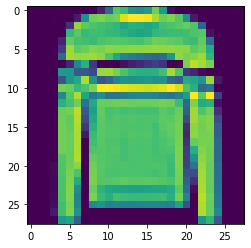

In [5]:
plt.imshow(X_train_full[5,:].reshape(28,28))

In [6]:
#creating a validation set 
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Building a neural network

In [8]:
#creates a single stack of layers connected sequentially
model = keras.models.Sequential()

In [9]:
#this is a Flatten layer. It converts the specified input shape into a (-1,1) instance. 
model.add(keras.layers.Flatten(input_shape = [28,28]))

In [10]:
#next we add the first hidden layer containing 300 neurons. It will use the Rectified Linear Unit Activation Function(ReLU). 
#This does not include bias terms 
model.add(keras.layers.Dense(300, activation = "relu"))

In [11]:
#next we add another hidden layer with 100 neurons in it
model.add(keras.layers.Dense(100, activation = "relu"))

In [12]:
#last we add in the output layer which has 10 neurons for the 10 different classes
model.add(keras.layers.Dense(10, activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
weights, biases = model.layers[1].get_weights()

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

The shape of the weight matrix is dependant on the number of inputs. This is why input_shape should be specified in keras.layers.Flatten. 

In [18]:
#using compile method to specify the loss function, optimizer to use and extra metrics to compute during training 
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "sgd",
                metrics = ["accuracy"])

In [19]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
keras.utils.to_categorical(y_train_full)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
history = model.fit(X_train,y_train,epochs = 30, 
                    validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9907 - accuracy: 0.6912 - val_loss: 0.4945 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4975 - accuracy: 0.8282 - val_loss: 0.4383 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4456 - accuracy: 0.8439 - val_loss: 0.4139 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4199 - accuracy: 0.8533 - val_loss: 0.3955 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3985 - accuracy: 0.8597 - val_loss: 0.4259 - val_accuracy: 0.8562
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8674 - val_loss: 0.3787 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3670 - accuracy: 0.8698 - val_loss: 0.4147 - val_accuracy:

For skewed datasets with some classes being overrepresented while others are underrepresented, it would be useful to set the class_weight argument in the fit method. 

For cases where we want instances to be given different weights, like in the case of outliers (NBA dataset), we need to use sample_weight. For sample_weight we can either pass a flat Numpy array with the same length as the input samples. 

In [22]:
import pandas as pd
df = pd.DataFrame(data = history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.709397,0.768127,0.494491,0.8332
1,0.486282,0.831073,0.438256,0.8534
2,0.441617,0.846345,0.413920,0.8546
3,0.415819,0.854527,0.395465,0.8660
4,0.394034,0.861764,0.425879,0.8562
5,0.378878,0.866709,0.378669,0.8676
6,0.364719,0.870909,0.414707,0.8532
7,0.353002,0.874909,0.375915,0.8648
8,0.341537,0.878000,0.344890,0.8800
9,0.333680,0.880564,0.344613,0.8776


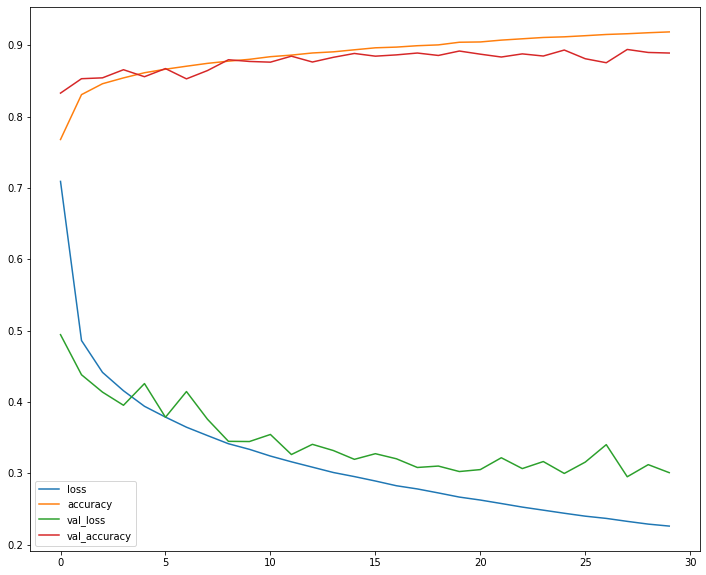

In [23]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (12,10))
ax.plot(df.index.values.tolist(),df["loss"], label = "loss")
ax.plot(df.index.values.tolist(),df["accuracy"], label = "accuracy")
ax.plot(df.index.values.tolist(),df["val_loss"], label = "val_loss")
ax.plot(df.index.values.tolist(),df["val_accuracy"], label = "val_accuracy")
ax.legend()

In [24]:
model.evaluate(X_test, y_test, return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 72.5884 - accuracy: 0.8308


{'loss': 72.58840942382812, 'accuracy': 0.8307999968528748}

Making predictions using a model

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
#y_proba.round(2)

In [26]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
model.predict_classes(X_new)

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

<h2> Building a Regression MLP using the Sequential API </h2> 

In [28]:
#using a regression neural network
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full_reg,x_test_reg,y_train_full_reg,y_test_reg = train_test_split(housing.data, housing.target)


x_train_reg, x_valid_reg, y_train_reg, y_valid_reg = train_test_split(x_train_full_reg, y_train_full_reg)

In [29]:
scaler = StandardScaler()
#notice that we fit_transform on the train set and transform on the validation and test sets
x_train_reg_scaled = scaler.fit_transform(x_train_reg)
x_valid_reg_scaled = scaler.transform(x_valid_reg)
x_test_reg_scaled = scaler.transform(x_test_reg)

In [30]:
model_reg = keras.models.Sequential()

In [31]:
#adding input layer
model_reg.add(keras.layers.InputLayer(input_shape = x_train_reg_scaled.shape[1:]))
model_reg.add(keras.layers.Dense(30, activation = "relu"))
#the output neuron has no activation function to it
model_reg.add(keras.layers.Dense(1))

In [32]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [33]:
#no need to always add the input_layer. We can always user keras.layers.Dense
model_test = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=x_train_reg_scaled.shape[1:]),
keras.layers.Dense(1)
])

In [34]:
x_train_reg_scaled.shape[1:]

(8,)

In [35]:
model_test.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_reg.compile(loss = "mean_squared_error", optimizer = "sgd", metrics=tf.keras.metrics.MeanSquaredError())

In [37]:
""" for epoch in range(n_epochs):
for i in range(m):
random_index = np.random.randint(m)
xi = X_b[random_index:random_index+1]
yi = y[random_index:random_index+1]
gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
eta = learning_schedule(epoch * m + i)
theta = theta - eta * gradients """

#The above code shows how epochs work. For each epoch, It selects batches of instances and then applies the training for a stochastic instance in each batch.

history = model_reg.fit(x_train_reg_scaled, y_train_reg, epochs = 20, validation_data = (x_valid_reg_scaled, y_valid_reg))


Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 2.2604 - mean_squared_error: 2.2604 - val_loss: 4.3936 - val_mean_squared_error: 4.3936
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 160.7994 - mean_squared_error: 160.7994 - val_loss: 1.2169 - val_mean_squared_error: 1.2169
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9052 - mean_squared_error: 0.9052 - val_loss: 9901.3223 - val_mean_squared_error: 9901.3223
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/20
363/363 [==============================] - 

In [38]:
history.history

{'loss': [1.2538857460021973,
  82.60726165771484,
  3.6981916427612305,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'mean_squared_error': [1.2538857460021973,
  82.60726165771484,
  3.6981916427612305,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'val_loss': [4.393558025360107,
  1.216890573501587,
  9901.322265625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'val_mean_squared_error': [4.393558025360107,
  1.216890573501587,
  9901.322265625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan]}

In [39]:
model_test.compile(loss = "mean_squared_error", optimizer = "sgd")

In [40]:

history = model_test.fit(x_train_reg_scaled, y_train_reg, epochs = 20, validation_data = (x_valid_reg_scaled, y_valid_reg))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4031 - val_loss: 0.9046
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2462 - val_loss: 0.5674
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4577 - val_loss: 0.4518
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4180 - val_loss: 0.4144
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4072 - val_loss: 0.4435
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4108 - val_loss: 0.5782
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4390 - val_loss: 0.3956
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4118 - val_loss: 0.3782
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3956 - val_loss: 0.3762
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4012 - val_loss: 0.3725

<h3> Building complex models using the Functional API </h3> 

These are non sequential neural networks. This architecture allows a neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)

In [41]:
#for functional APIS
#new layer = newlayerconfig(previous_layer)
#create an Input opbject
inputlayer = keras.layers.Input(shape = x_train_full_reg.shape[1:])
#30 neuron dense layer using ReLU activation. Once created we call it like a function and pass in the input layer as a parameter
hidden1 = keras.layers.Dense(30, activation = "relu")(inputlayer)
#second hidden layer
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
#this concatenates the input and the output of the second layer
concat = keras.layers.concatenate([inputlayer,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [inputlayer], outputs = [output])

In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           930         dense_7[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_8[0][0]                

In [43]:
#sending a subset of features through the wide path and a different subset through the deep path
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat_2 = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat_2)
model = keras.models.Model(inputs = [input_A,input_B], outputs = [output])

In [44]:
#instead of passing a single input matrix, we need to input 2 different matrices. 
#using a regression neural network
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full_reg,x_test_reg,y_train_full_reg,y_test_reg = train_test_split(housing.data, housing.target)


x_train_reg, x_valid_reg, y_train_reg, y_valid_reg = train_test_split(x_train_full_reg, y_train_full_reg)
scaler = StandardScaler()
#notice that we fit_transform on the train set and transform on the validation and test sets
x_train_reg = scaler.fit_transform(x_train_reg)
x_valid_reg = scaler.transform(x_valid_reg)
x_test_reg= scaler.transform(x_test_reg)

model.compile(loss = "mse", optimizer = "sgd", metrics= tf.keras.metrics.MeanSquaredError())

X_train_A, X_train_B = x_train_reg[:,:5],x_train_reg[:,2:]
X_valid_A, X_valid_B = x_valid_reg[:,:5],x_valid_reg[:,2:]
X_test_A,X_test_B = x_test_reg[:,:5],x_test_reg[:,2:]
X_new_A,X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A,X_train_B),y_train_reg, epochs = 20, validation_data = ((X_valid_A, X_valid_B),y_valid_reg))

mse_test = model.evaluate((X_test_A,X_test_B),y_test_reg)

y_pred_test = model.predict((X_test_A, X_test_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0716 - mean_squared_error: 2.0716 - val_loss: 0.5896 - val_mean_squared_error: 0.5896
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7421 - mean_squared_error: 0.7421 - val_loss: 5.2934 - val_mean_squared_error: 5.2934
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 2.8195 - mean_squared_error: 2.8195 - val_loss: 0.5234 - val_mean_squared_error: 0.5234
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4834 - mean_squared_error: 0.4834 - val_loss: 0.4880 - val_mean_squared_error: 0.4880
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - mean_squared_error: 0.4201 - val_loss: 0.4314 - val_mean_squared_error: 0.4314
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4021 - mean_squared_error: 0.4021 - val_loss: 0.4183 - val_mean_squared_error: 0.4183
Epoch 7/20
363/363 [========

In [45]:
y_pred_test

array([[1.5185499],
       [2.981575 ],
       [2.023159 ],
       ...,
       [1.2162044],
       [1.361015 ],
       [1.8748822]], dtype=float32)

<h3> There can be situations in which you want multiple outputs </h3> 

- Locating an object in a picture (regression to find coordinates and classification to classify image)

- Multiple independent tasks to perform based on the same data. Train one neural network per task is possible, but this is inefficient. Also training one neural network with mutltiple outputs for the entire set of tasks allows higher accuracy too. This is because the neural network can learn data useful across the tasks. 


In [46]:
#multioutput
input_A_multi = keras.layers.Input(shape = [5])
input_B_mutli = keras.layers.Input(shape = [6])
hidden1_multi = keras.layers.Dense(30, activation = 'relu')(input_B_mutli)
hidden2_multi = keras.layers.Dense(30, activation = 'relu')(hidden1_multi)
concat_multi = keras.layers.concatenate([input_A_multi, hidden2_multi])
output1 = keras.layers.Dense(1)(concat_multi)
output_aux = keras.layers.Dense(1)(hidden1_multi)
model_multi = keras.models.Model(inputs = [input_A_multi,input_B_mutli], outputs = [output1,output_aux])

For multi output neural networks, each output requires its own loss function. If one is passed, keras assumes its the same for all.

In [47]:
#usually different outputs will be given different weights
model_multi.compile(loss = ['mse','mse'],loss_weights = [0.9,0.1],optimizer = "sgd")


In [48]:
#as we are using auxillary outputs, we will need to pass in auxillary output labels too
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7281 - dense_15_loss: 1.5138 - dense_16_loss: 3.6569 - val_loss: 1.3791 - val_dense_15_loss: 1.3791 - val_dense_16_loss: 1.3787
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 2.8989 - dense_15_loss: 3.0781 - dense_16_loss: 1.2863 - val_loss: 1.1918 - val_dense_15_loss: 1.1918 - val_dense_16_loss: 1.1919
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7037 - dense_15_loss: 0.6530 - dense_16_loss: 1.1602 - val_loss: 0.5870 - val_dense_15_loss: 0.5360 - val_dense_16_loss: 1.0459
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5608 - dense_15_loss: 0.5104 - dense_16_loss: 1.0143 - val_loss: 0.5135 - val_dense_15_loss: 0.4647 - val_dense_16_loss: 0.9534
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5013 - dense_15_loss: 0.4535 - dense_16_loss: 0.9321 - val_loss: 0.4857 - val_dense_15_loss: 0.4419 - val_de

In [49]:
#if you have more than one output, you will have more than one loss
total_loss, main_loss, aux_loss = model_multi.evaluate([X_test_A,X_test_B],[y_test_reg,y_test_reg])

162/162 [==============================] - 0s 855us/step - loss: 0.4091 - dense_15_loss: 0.3823 - dense_16_loss: 0.6503


In [50]:
main_loss

0.38230040669441223

In [51]:
y_pred_main, y_pred_aux = model_multi.predict([X_test_A,X_test_B])

In [52]:
import seaborn as sns

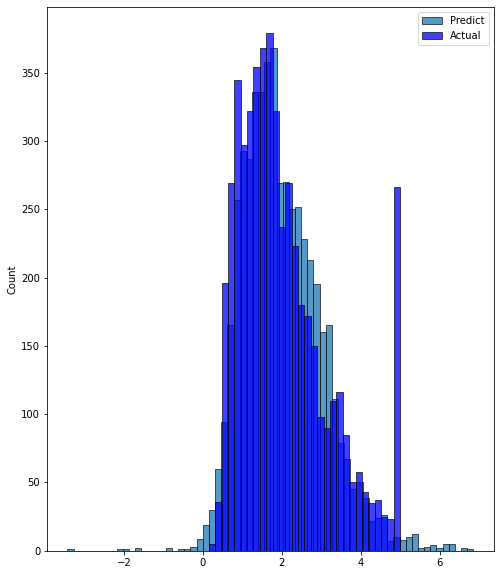

In [53]:
fig,ax_multi = plt.subplots(1,1,figsize = (8,10))
sns.histplot(y_pred_main, ax = ax_multi, color = 'red', label = 'Predict')
sns.histplot(y_test_reg, ax = ax_multi, color = 'blue', label = 'Actual')
ax_multi.legend()

<h2> Subclassing API </h2> 

The sequential and functional APIs are easy to save, clone, its structure can be displayed and analyszed, its framework can infer shapes and check types, errors can be caught early. This is because the model is a static graph of layers. 

However as it is a static graph of layers, it cannot train models involving loops, varying shapes, conditional branching and other dynamic behaviors. 

Instead we use the Subclass API

In [54]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        #only instantiates the layers
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output,aux_output

Notice that now we have separated layer initialization from layer architecture. Hence we can call this function with the respective inputs whenever required during normal programming operations.

However now your model's architecture is hidden within the call() method. Hence we cannot clone or save the model. And we cannot inspect the summary of the model. Hence Sequential API and Functional API are safer options

In [55]:
#saving a Keras model
model_multi.save("multi_output_model.h5")

In [56]:
import h5py
model_h5 = h5py.File('multi_output_model.h5','r')
model_h5.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [57]:
model_h5['model_weights']

<HDF5 group "/model_weights" (7 members)>

There are 2 ways in which you can load a model. Either by loading the entire model or just the weights. Use load_weights to load only the weights. However here we have to create a model architecture which matches that of the weights.

In [58]:
"""
def create_model():
    .....model architecture...

model = create_model()
model.load_weights(weights_path/h5 file name)
"""

'\ndef create_model():\n    .....model architecture...\n\nmodel = create_model()\nmodel.load_weights(weights_path/h5 file name)\n'

Training a model can take several hours sometimes. It is important to ensure that you do not loose progress by not saving. Hence we have to save at checkpoints at regular intervals during training. For this we use callbacks

<h3> Using Callbacks </h3> 

The fit() method has a callback argument which accepts a keras.callbacks object which specifies when the model should save. We can specify whether to save after each epoch, each batch or end of training. 


In [59]:
#saves at end of each epoch. 
checkpoint_cb = keras.callbacks.ModelCheckpoint('multi_output_model_cb.h5')
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=checkpoint_cb)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3767 - dense_15_loss: 0.3479 - dense_16_loss: 0.6362 - val_loss: 0.3929 - val_dense_15_loss: 0.3597 - val_dense_16_loss: 0.6917
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3898 - dense_15_loss: 0.3627 - dense_16_loss: 0.6335 - val_loss: 0.3883 - val_dense_15_loss: 0.3568 - val_dense_16_loss: 0.6725
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3690 - dense_15_loss: 0.3404 - dense_16_loss: 0.6267 - val_loss: 0.3923 - val_dense_15_loss: 0.3571 - val_dense_16_loss: 0.7096
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3655 - dense_15_loss: 0.3367 - dense_16_loss: 0.6246 - val_loss: 0.3889 - val_dense_15_loss: 0.3541 - val_dense_16_loss: 0.7021
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3672 - dense_15_loss: 0.3390 - dense_16_loss: 0.6215 - val_loss: 0.3860 - val_dense_15_loss: 0.3525 - val_de

Saving at checkpoints allows us to only save a model with the best score on the validation set. 

In [60]:
#the two outputs have different weights for their losses. 
trainingdf = pd.DataFrame(data = history.history)
trainingdf

,loss,dense_15_loss,dense_16_loss,val_loss,val_dense_15_loss,val_dense_16_loss
0,0.376727,0.347896,0.636205,0.392882,0.359682,0.691682
1,0.389769,0.362689,0.633492,0.388331,0.356761,0.672460
2,0.368995,0.340363,0.626683,0.392331,0.357077,0.709615
3,0.365452,0.336652,0.624650,0.388931,0.354135,0.702091
4,0.367221,0.338966,0.621518,0.385963,0.352543,0.686740
5,0.361638,0.332971,0.619635,0.385837,0.351380,0.695948
6,0.359667,0.330906,0.618520,0.385583,0.352002,0.687807
7,0.358198,0.329343,0.617889,0.384700,0.350277,0.694508
8,0.357464,0.328868,0.614825,0.382680,0.348019,0.694636
9,0.357469,0.329076,0.613003,0.380656,0.348522,0.669862


In [61]:
model_multi.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           210         input_6[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
____________________________________________________________________________________________

In [62]:
trainingdf.loc[trainingdf["val_loss"] == trainingdf["val_loss"].min()]

,loss,dense_15_loss,dense_16_loss,val_loss,val_dense_15_loss,val_dense_16_loss
18,0.347574,0.319171,0.603202,0.371339,0.337248,0.678156


In [63]:
#saving the one with best score on the validation set

checkpoint_cb = keras.callbacks.ModelCheckpoint('multi_output_model_cb.h5', save_best_only=True)
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=checkpoint_cb)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3449 - dense_15_loss: 0.3168 - dense_16_loss: 0.5976 - val_loss: 0.3968 - val_dense_15_loss: 0.3668 - val_dense_16_loss: 0.6665
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3448 - dense_15_loss: 0.3168 - dense_16_loss: 0.5963 - val_loss: 0.3695 - val_dense_15_loss: 0.3378 - val_dense_16_loss: 0.6542
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3443 - dense_15_loss: 0.3164 - dense_16_loss: 0.5958 - val_loss: 0.3768 - val_dense_15_loss: 0.3438 - val_dense_16_loss: 0.6738
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3437 - dense_15_loss: 0.3160 - dense_16_loss: 0.5934 - val_loss: 0.3674 - val_dense_15_loss: 0.3350 - val_dense_16_loss: 0.6591
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3413 - dense_15_loss: 0.3136 - dense_16_loss: 0.5910 - val_loss: 0.3780 - val_dense_15_loss: 0.3481 - val_de

Another way to implement saving the iteration with the best score on the validation score is to use early stopping

Using the EarlyStopping callback
It will interrupt training when it measures no progress on the validation set for a number of epochs and also roll back to the best model.


In [64]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)

#while checkpoint_cb saves the model(at end of each epoch by default) and saves only the best validation score if save_best_only = True
#early_stoppin checks if the validation score improves over 10 iterations after each previous 
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3332 - dense_15_loss: 0.3065 - dense_16_loss: 0.5741 - val_loss: 0.3868 - val_dense_15_loss: 0.3601 - val_dense_16_loss: 0.6272
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3333 - dense_15_loss: 0.3067 - dense_16_loss: 0.5728 - val_loss: 0.3546 - val_dense_15_loss: 0.3234 - val_dense_16_loss: 0.6354
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3332 - dense_15_loss: 0.3064 - dense_16_loss: 0.5747 - val_loss: 0.3732 - val_dense_15_loss: 0.3428 - val_dense_16_loss: 0.6473
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3338 - dense_15_loss: 0.3074 - dense_16_loss: 0.5719 - val_loss: 0.3673 - val_dense_15_loss: 0.3360 - val_dense_16_loss: 0.6490
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3304 - dense_15_loss: 0.3037 - dense_16_loss: 0.5707 - val_loss: 0.3534 - val_dense_15_loss: 0.3224 - val_de

In [65]:
#we can also write our own call backs
class PrintValTrainRatio(keras.callbacks.Callback):
    #on_epoch_end is a function belonging to Callback which has been inherited
    def on_epoch_end(self,epoch,logs):
        print("\n Val/Train : {}".format(logs["val_loss"]/logs["loss"]))

In [66]:
printvaltrain = PrintValTrainRatio()
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=[checkpoint_cb,early_stopping_cb,printvaltrain])

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3264 - dense_15_loss: 0.3008 - dense_16_loss: 0.5572 - val_loss: 0.3468 - val_dense_15_loss: 0.3173 - val_dense_16_loss: 0.6117

 Val/Train : 1.062324600243543
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3242 - dense_15_loss: 0.2983 - dense_16_loss: 0.5565 - val_loss: 0.3517 - val_dense_15_loss: 0.3227 - val_dense_16_loss: 0.6125

 Val/Train : 1.0848875896415826
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3258 - dense_15_loss: 0.3004 - dense_16_loss: 0.5544 - val_loss: 0.3500 - val_dense_15_loss: 0.3220 - val_dense_16_loss: 0.6022

 Val/Train : 1.0742648595030677
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3251 - dense_15_loss: 0.2995 - dense_16_loss: 0.5554 - val_loss: 0.3474 - val_dense_15_loss: 0.3180 - val_dense_16_loss: 0.6121

 Val/Train : 1.0686655022815708
Epoch 5/20
363/363 [==============================] -

<h3> Tensorboard </h3> 

To use Tensorboard, we must modify the program such that it outputs the data we want to visualize to special binary log files called **event files**. Each binary record is called a summary. 

The Tensorboard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations. 

Usually we want the TensorBoard server to point to a root log directory and configure the program to write to a different sub directory everytime it runs. 

In [67]:
root_logdir = os.path.join(os.curdir,"my_logs")

def get_run_logdir():
    import time
    #time.strftime is used when we are getting the data from a function like time.localtime()
    #time.strptime is used to convert an existing string of time to a format we want
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S", time.localtime())
    return os.path.join(root_logdir,run_id)

In [68]:
import time

In [69]:
time.localtime()

time.struct_time(tm_year=2021, tm_mon=4, tm_mday=10, tm_hour=11, tm_min=34, tm_sec=24, tm_wday=5, tm_yday=100, tm_isdst=0)

In [70]:
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S", time.localtime())

In [71]:
run_id

'run_2021_04_10-11_34_24'

In [72]:
run_logdir = get_run_logdir()
#this allows to create many subdirectories at the end of each epoch under the main directory "my_logs"
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model_multi.fit([X_train_A,X_train_B],[y_train_reg,y_train_reg], epochs = 20, validation_data= ([X_valid_A, X_valid_B],[y_valid_reg, y_valid_reg]), callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3171 - dense_15_loss: 0.2925 - dense_16_loss: 0.5387 - val_loss: 0.3513 - val_dense_15_loss: 0.3244 - val_dense_16_loss: 0.5935
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3172 - dense_15_loss: 0.2926 - dense_16_loss: 0.5382 - val_loss: 0.3435 - val_dense_15_loss: 0.3155 - val_dense_16_loss: 0.5962
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3161 - dense_15_loss: 0.2917 - dense_16_loss: 0.5361 - val_loss: 0.3510 - val_dense_15_loss: 0.3246 - val_dense_16_loss: 0.5888
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3167 - dense_15_loss: 0.2923 - dense_16_loss: 0.5355 - val_loss: 0.3483 - val_dense_15_loss: 0.3199 - val_dense_16_loss: 0.6038
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3160 - dense_15_loss: 0.2917 - dense_16_loss: 0.5355 - val_loss: 0.3458 - val_dense_15_loss: 0.3183 - val_de

<h2> Hyperparameter Tuning of Neural Networks</h2> 

One option is to use GridSearchCV or RandomizedSearchCV

In [73]:
#wrap our Keras models in objects that mimic regular Scikit-Learn regressors. Create a function that will build and compile a Keras model, given a set of hyperparameters
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    options = {"input_shape":input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu",**options))
        options = {}
    model.add(keras.layers.Dense(1 , **options))
    #we add the optimizer like this so that we can specify the learning rate
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse",optimizer = optimizer)
    return model

In [74]:
#using Functional API method with ability to specify varying neuron numbers
def build_model_2(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    input_layer = keras.layers.Input(shape = input_shape)
    hidden_layers = list()
    type_of_n_neuron_entry = type(n_neurons)
    prev_layer = input_layer
    if type_of_n_neuron_entry == int:
        for layer in range(n_hidden):
            hidden_layers.append(keras.layers.Dense(n_neurons, activation = "relu")(prev_layer))
            prev_layer = hidden_layers[-1]
    elif type_of_n_neuron_entry == list:
        for i in range(n_hidden):
            hidden_layers.append(keras.layers.Dense(n_neurons[i],activation = "relu")(prev_layer))
            prev_layer = hidden_layers[-1]
    else:
        raise TypeError('n_neuron should be int or list type')
    output = keras.layers.Dense(1)(hidden_layers[-1])
    model = keras.models.Model(inputs = input_layer, outputs = [output])
    #we add the optimizer like this so that we can specify the learning rate
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse",optimizer = optimizer)
    return model

In [75]:
#create a KerasRegressor based on the build_model function

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

KerasRegressor object is a thin wrapper around the Keras model built using build_model(). Since we did not specify any hyperparameter when creating it, it will just use the default hyperparameters we defined in build_model(). 

As we have specified build_model with certain parameters, now we can use **keras_reg** like a regular sklearn regressor.

Any parameter we pass to the fit() method of keras_reg, will be passed to the underlying Keras model. 

In [76]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate":reciprocal(3e-4,3e-2)
}

In [77]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
#All the parameters in the fit method get relayed to the underlying Keras Mode
rnd_search_cv.fit(x_train_reg,y_train_reg, epochs = 10, validation_data = (x_valid_reg,y_valid_reg),
callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

========================] - 0s 1ms/step - loss: 0.3431 - val_loss: 0.3894
Epoch 10/10
121/121 [==============================] - 0s 576us/step - loss: 0.3868
Epoch 1/10
242/242 [==============================] - 1s 1ms/step - loss: 3.4492 - val_loss: 1.3279
Epoch 2/10
242/242 [==============================] - 0s 997us/step - loss: 1.1171 - val_loss: 2.8102
Epoch 3/10
242/242 [==============================] - 0s 983us/step - loss: 1.1355 - val_loss: 8.1979
Epoch 4/10
242/242 [==============================] - 0s 1ms/step - loss: 10.9039 - val_loss: 26.7846
Epoch 5/10
242/242 [==============================] - 0s 1ms/step - loss: 12.5224 - val_loss: 89.8200
Epoch 6/10
242/242 [==============================] - 0s 999us/step - loss: 25.8562 - val_loss: 304.0906
Epoch 7/10
242/242 [==============================] - 0s 1ms/step - loss: 124.2003 - val_loss: 1021.7225
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 1452.3542 - val_loss: 3455.5234
Epoch 9/10
242/242

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000244820A4A00>, as the constructor either does not set or modifies parameter learning_rate

In [113]:
rnd_search_cv.best_params_

{'learning_rate': 0.011133075366404921, 'n_hidden': 3, 'n_neurons': 33}

In [114]:
rnd_search_cv.best_score_

-0.37642330924669903

The unified scoring API always maximizes the score, so scores which need to be minimized are negated in order for the unified scoring API to work correctly. While scores which need to be maximised are kept positive. 

In [78]:
best_model = build_model(n_hidden = 3, n_neurons = 33, learning_rate = 0.011133075366404921, input_shape = [8])

In [79]:
history_best_model = best_model.fit(x_train_reg,y_train_reg, epochs = 10, validation_data = (x_valid_reg,y_valid_reg),
callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.2311 - val_loss: 0.5658
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5200 - val_loss: 0.4642
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4517 - val_loss: 0.4235
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4341 - val_loss: 0.4215
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4030 - val_loss: 0.4156
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3981 - val_loss: 0.3989
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3873 - val_loss: 0.4101
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3669 - val_loss: 0.3809
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3520 - val_loss: 0.3772
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3541 - val_loss: 0.3623

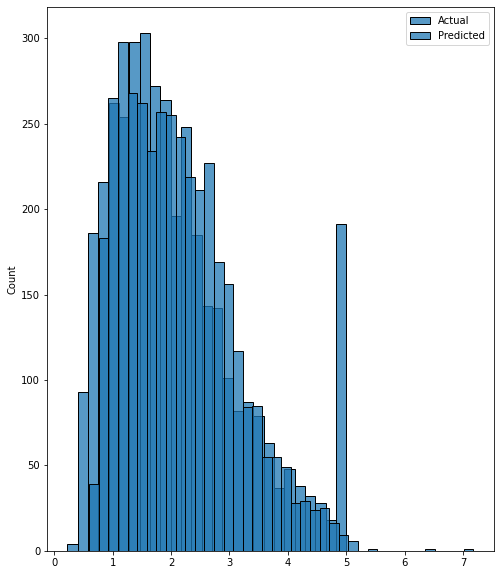

In [80]:
y_pred = best_model.predict(x_valid_reg)
fig,ax_best = plt.subplots(1,1,figsize = (8,10))
sns.histplot(y_valid_reg, ax = ax_best, label = 'Actual')
sns.histplot(y_pred, ax = ax_best, label = "Predicted")
ax_best.legend()

In [81]:
df_best_model = pd.DataFrame(data = history_best_model.history)
df_best_model

,loss,val_loss
0,0.749101,0.565843
1,0.516577,0.464196
2,0.439561,0.423527
3,0.416545,0.421457
4,0.405481,0.415570
5,0.398528,0.398936
6,0.384862,0.410111
7,0.367804,0.380877
8,0.360016,0.377216
9,0.350841,0.362288


With Randomized Search CV, when there is a very large parameter space, this approach will only explore a tiny portion of the hyperparameter space.      

To overcome this, first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller range of values centered on the best ones found during the first run. 

<h2>General Guidelines When Hyperparameter Tuning</h2>


- Number of Hidden Layers

Deep neural networks have a much higher parameter efficiency than shallow nets, allowing them to model complex functions using exponentially fewer neurons than shallow nets. 

Lower hidden layers tend to model low-level structures, intermediate hidden layers combine these low level strutures to model intermediate level structures and the higher hidden layers and the output layer combine these intermediate structures to model high level structures. 

For example, if you have already trained a model to recognize faces in pictures, and you now want to train a new neural network to recognize hairstyles, then you can kickstart training by reusing the lower layers of the first network.

Using the lower layers of a previously built neural network, and attaching new layers to it, so that we can make the network to learn higher level structures using the deeper newer layers. This is called transfer learning. 


<h2> Learning Rate </h2> 

- The most important hyperparameter. The optimal learning rate is about half the maximum learning rate(rate at which the algorithm diverges). A simple approach is to start with a large value which makes the algorithm diverge. Divide this by 3 and try again. Repeat until algorithm stops diverging. 

- Choose a better optimizer.






